# Import necessary libraries

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np


# Load bioactivity data

In [2]:
df = pd.read_csv("data/bioactivity_data_curated.csv")

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate
...,...,...,...,...
179,CHEMBL4437284,CON(C)C(=O)[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=O)...,1000000.0,Inactive
180,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,2000000.0,Inactive
181,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,383.0,Active
182,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,Active


# Calculate lipinsiki descriptor

Lipsinki descriptor comes from Lipsinki's rule of five.
Lipinski's rule of five is a concept frequently used in drug discovery. This rule helps to predict if a biologically active molecule is likely to have the chemical and physical properties to be orally bioavailable. The Lipinski rule bases pharmacokinetic drug properties such as absorption, distribution, metabolism and excretion on specific physicochemical properties such as:

1. No more than 5 hydrogen bond donors

2. No more than 10 hydrogen bond acceptors

3. Molecular mass less than 500 Da

4. Partition coefficient not greater than 5

According to Lipinski's rule of five, an orally active drug can have no more than one violation of these conditions.
The name "rule of five" comes from the fact that all the conditions have multiples of five as the determinant conditions.


In [4]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW(Molecular Weight)","LogP(Solubility)","NumHDonors(Hydrogen donors)","NumHAcceptors(Hydrogen acceptors)"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [5]:
df_lipinski = lipinski(df.canonical_smiles) 

In [6]:
df_lipinski


,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors)
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
179,747.692,0.51020,6.0,9.0
180,758.715,1.60970,6.0,9.0
181,328.466,3.34562,1.0,5.0
182,222.379,-1.99300,1.0,3.0


In [7]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [8]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors)
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
179,CHEMBL4437284,CON(C)C(=O)[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=O)...,1000000.0,Inactive,747.692,0.51020,6.0,9.0
180,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,2000000.0,Inactive,758.715,1.60970,6.0,9.0
181,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,383.0,Active,328.466,3.34562,1.0,5.0
182,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,Active,222.379,-1.99300,1.0,3.0


In [9]:
df_combined.standard_value.describe()

count    1.840000e+02
mean     6.100187e+04
std      1.903620e+05
min      5.000000e+01
25%      4.955000e+03
50%      1.506781e+04
75%      4.073803e+04
max      2.000000e+06
Name: standard_value, dtype: float64

# capping  standard value to 1e9 and converting IC50 to pIC50


In [10]:
df['standard_value'] = df['standard_value'].clip(upper=10e9)
df_combined['pIC50'] = -np.log10(df.standard_value * 1e-9)

In [11]:
df_combined.pIC50.describe()

count    184.000000
mean       4.938454
std        0.889779
min        2.698970
25%        4.390000
50%        4.821954
75%        5.305011
max        7.301030
Name: pIC50, dtype: float64

In [12]:
df_combined.drop(columns = ['standard_value'],inplace = True)

In [13]:
df_final_3class = df_combined
df_final_2class = df_combined[df_combined.bioactivity_class != "Intermediate"]

In [14]:
df_final_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
179,CHEMBL4437284,CON(C)C(=O)[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=O)...,Inactive,747.692,0.51020,6.0,9.0,3.000000
180,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,Inactive,758.715,1.60970,6.0,9.0,2.698970
181,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,Active,328.466,3.34562,1.0,5.0,6.416801
182,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],Active,222.379,-1.99300,1.0,3.0,6.782516


# Import libraries for plot

In [15]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Frequency plot of the bioactivity classes 

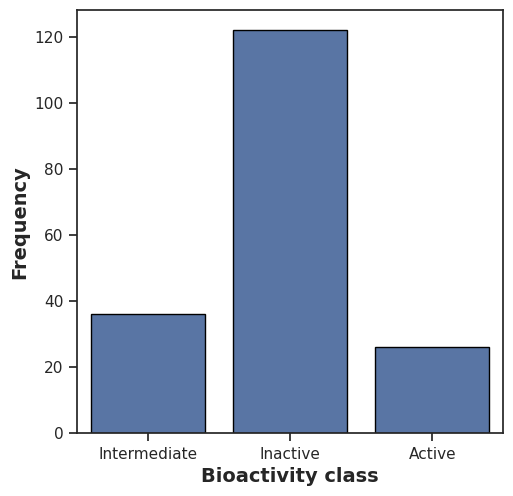

In [16]:
plt.figure(figsize =(5.5,5.5))
sns.countplot(x='bioactivity_class',data= df_final_3class, edgecolor = 'black')

plt.xlabel("Bioactivity class", fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency', fontsize = 14,  fontweight = 'bold')
plt.savefig(f"results/plot_bioactivity_3_class.pdf")

plt.show()


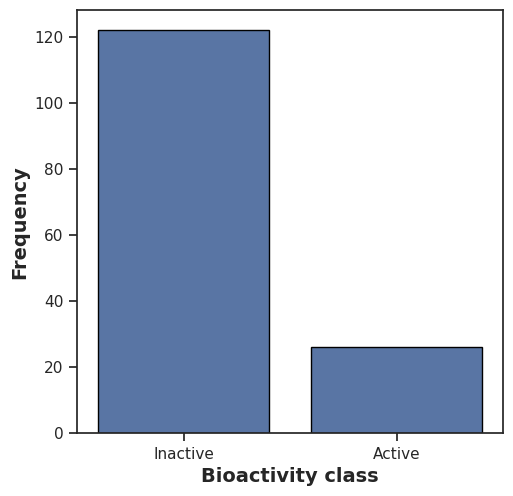

In [17]:
plt.figure(figsize =(5.5,5.5))
sns.countplot(x='bioactivity_class',data= df_final_2class,edgecolor = 'black')

plt.xlabel("Bioactivity class", fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency', fontsize = 14,  fontweight = 'bold')
plt.savefig(f"results/plot_bioactivity_2_class.pdf")

plt.show()
#plt.savefig('plot_bioactivity_2_class.pdf')

# Scatterplot between MW vs Log50

<function matplotlib.pyplot.show(close=None, block=None)>

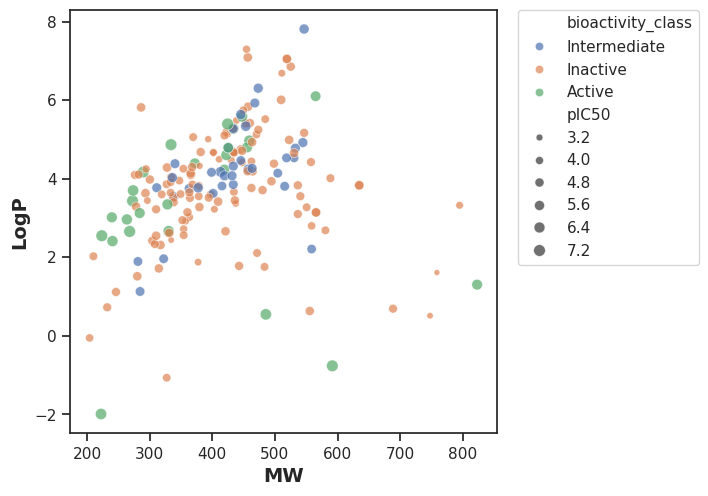

In [19]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(
    x="MW(Molecular Weight)", 
    y="LogP(Solubility)", 
    data=df_final_3class,
    size = 'pIC50',
    hue = "bioactivity_class",
    alpha = 0.7
)
plt.xlabel('MW', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_vs_LogP_3class.pdf')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

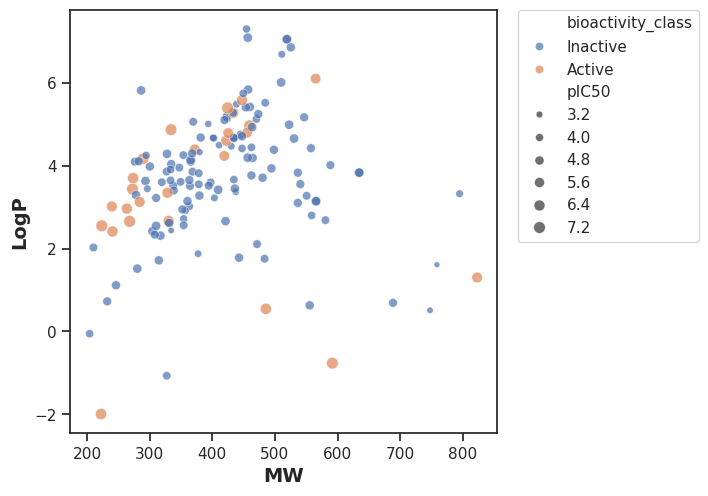

In [20]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(
    x="MW(Molecular Weight)", 
    y="LogP(Solubility)", 
    data=df_final_2class,
    size = 'pIC50',
    hue = "bioactivity_class",
    alpha = 0.7
)
plt.xlabel('MW', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_vs_LogP_2class.pdf')
plt.show


# Box plots


# pIC50

<function matplotlib.pyplot.show(close=None, block=None)>

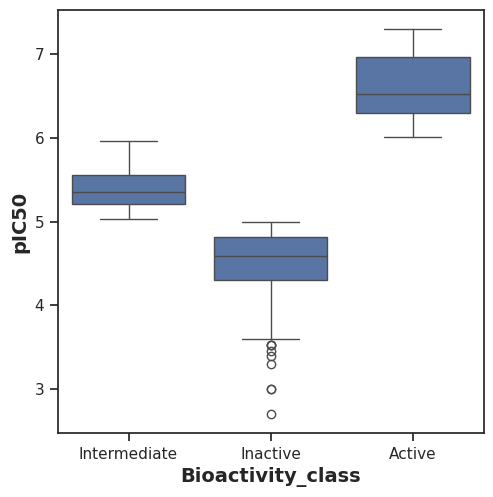

In [23]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="pIC50",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('pIC50', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_ic50_3class.pdf')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

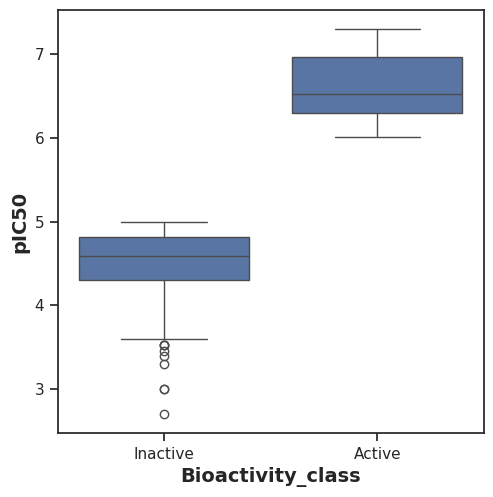

In [24]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="pIC50",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('pIC50', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_ic50_2class.pdf')
plt.show

# MW

<function matplotlib.pyplot.show(close=None, block=None)>

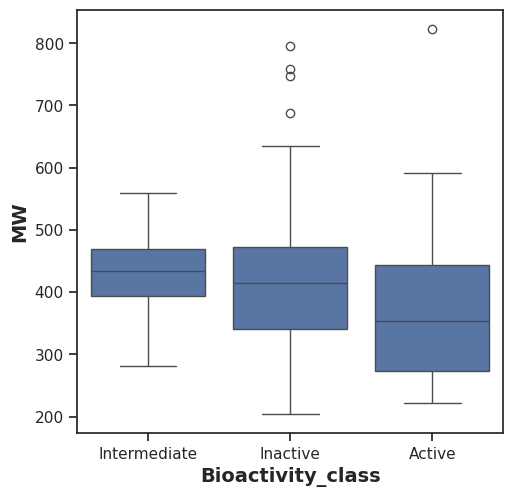

In [27]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="MW(Molecular Weight)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('MW', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_3class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

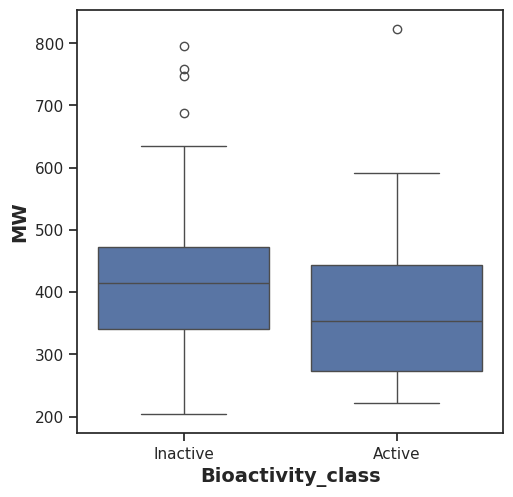

In [28]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="MW(Molecular Weight)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('MW', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_2class.pdf')
plt.show

# Log P

<function matplotlib.pyplot.show(close=None, block=None)>

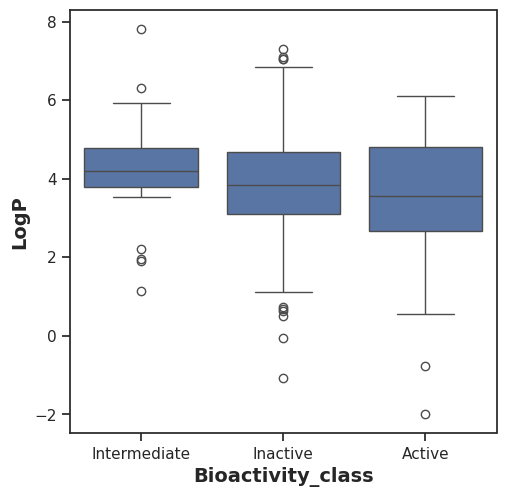

In [30]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="LogP(Solubility)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_LogP_3class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

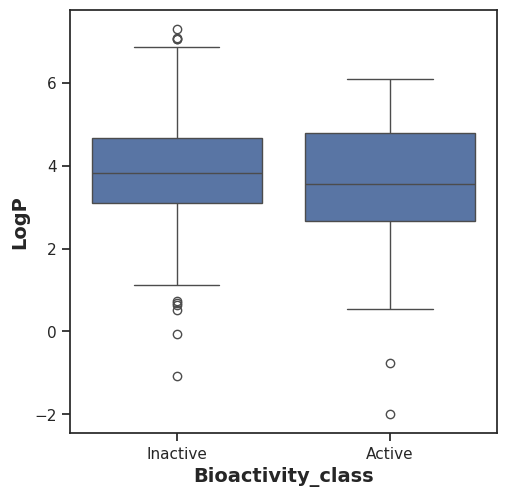

In [31]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="LogP(Solubility)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_LogP_2class.pdf')
plt.show

# NumHdonors

<function matplotlib.pyplot.show(close=None, block=None)>

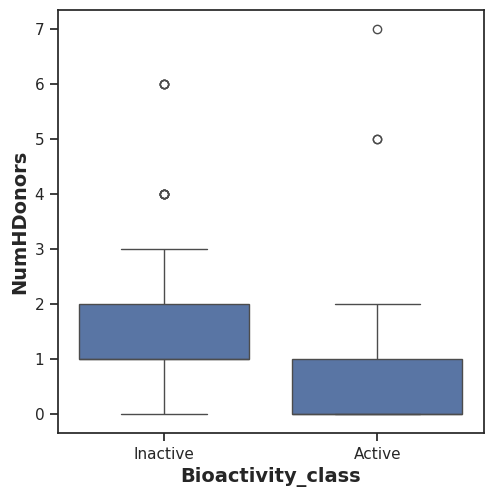

In [34]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHDonors(Hydrogen donors)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHDonors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHDonors_2class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

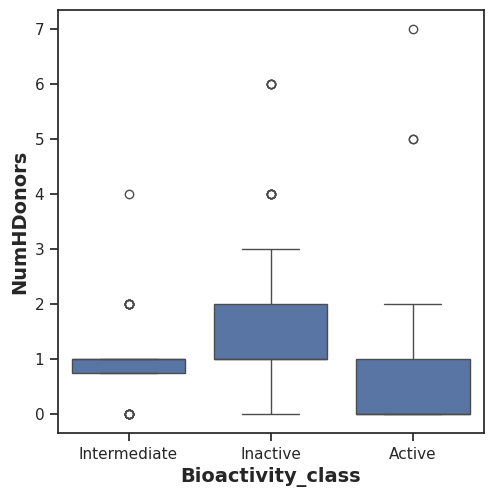

In [37]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHDonors(Hydrogen donors)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHDonors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHDonors_3class.pdf')
plt.show

# NumHAcceptors

<function matplotlib.pyplot.show(close=None, block=None)>

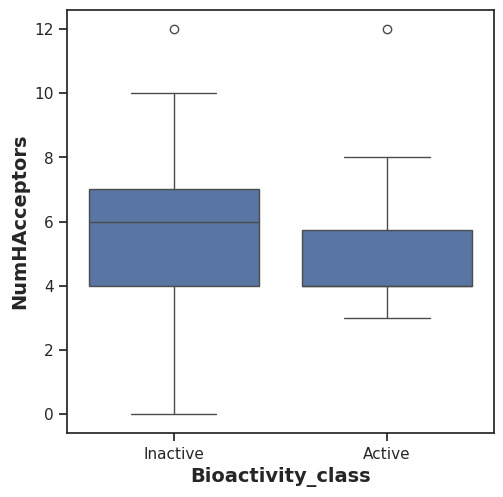

In [36]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHAcceptors(Hydrogen acceptors)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHAcceptors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHacceptors_2class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

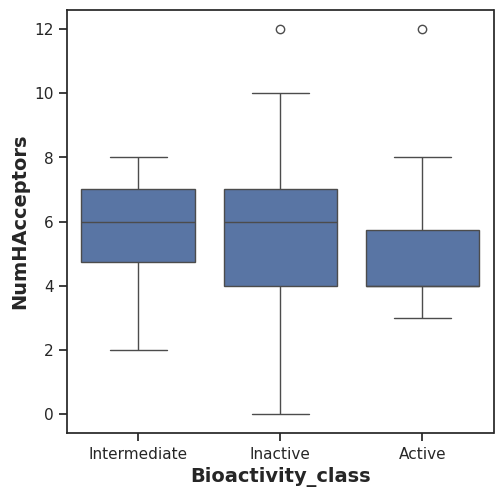

In [38]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHAcceptors(Hydrogen acceptors)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHAcceptors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHacceptors_3class.pdf')
plt.show